# Amittai W

## Computational Comparative Literature

### Imports

In [1]:
import warnings

# ignore bugging deprecation warnings.
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=DeprecationWarning)

  # essential imports
  import matplotlib.pyplot as plt
  import random
  import numpy as np
  import pandas as pd
  from pandas import DataFrame
  pd.set_option('display.max_rows', 600)
  from sklearn.feature_extraction.text import TfidfVectorizer
  import glob
  from os import path
  from IPython.display import display, HTML

  # LDA analysis
  import pyLDAvis
  import pyLDAvis.gensim_models
  import pickle

  # visualize word-clouds
  from wordcloud import WordCloud

  # Visualize Cosine Similarities
  from sklearn.metrics.pairwise import linear_kernel
  from sklearn.metrics import ConfusionMatrixDisplay

  # %pip install gensim
  import gensim.corpora as corpora
  import gensim
  
  # tensrflow
  import tensorflow as tf
  from tensorflow.python.client import device_lib 
  print(device_lib.list_local_devices())


  import os

  # type annotations
  from typing import List, Tuple, Set


/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6873723077904168876
xla_global_id: -1
]


2022-06-11 22:19:15.263054: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# stop words

class Colors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

def load_stopwords():
  stopwords = []
  with open("../data/metadata/stopwords.txt") as f:
    for line in f:
      # print(line)
      stopwords.append(line.strip()) # .append(line.strip())
  return stopwords

stop_words = load_stopwords()

print(Colors.OKBLUE + "Hello, welcome to my project!" + Colors.ENDC)
print(f"{stop_words = }")

Hello, welcome to my project!
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'cert

In [5]:
# years to focus on
years = [str(yr) for yr in range(2000, 2023)]

# max count per year
max_count = 10

print(f"Using year range {years[0]} to {years[-1]}") # , max_count

Using year range 2000 to 2022


1.

In [6]:
# load $count files for each year.
directory_path = "../data/categorized"

def load_dictionary():
  # all_words = []
  dictionary = set()
  dictionary_file = "../data/metadata/dictionary"
  with open(dictionary_file) as f:
    for line in f:
      dictionary.add(line.strip().lower())
  return dictionary

def load_counts():
  with open("../data/metadata/counts.csv", "r") as counts_file:
    counts = pd.read_csv(counts_file)
  return counts

def load_words() -> List[List[str]]:
  """Load data (words) into a list of lists of words."""
  dictionary = load_dictionary()
  stop_words = load_stopwords()
  all_words = []
  for year in years:
    possible_files = [f for f in glob.glob(f"{directory_path}/{year}/*.txt") if path.exists(f)]
    num_files = min(max_count, len(possible_files))
    files = np.random.choice(possible_files, size=num_files, replace=True)
    words = []
    for file in files:
      with open(file) as f:
        for line in f:
          for word in line.strip().lower().split():
            if word in dictionary and word not in stop_words + ["old", "id"]:
              words.append(word)
    # pd = DataFrame([year, words], columns=["year", "words"])
    all_words.append(words)
  return all_words

all_words = load_words()
def load_words_str():
  """Load data (words) into a list of strings."""
  global all_words
  if "all_words" not in globals():
    all_words = load_words()
  return [" ".join(w) for w in all_words]

def load_data():
  """Load data (words0 into a dataframe)"""
  all_words = load_words_str()
  df = pd.DataFrame(all_words, columns = ["words"])
  df.insert(0, "year", years, allow_duplicates=False)
  return df

raw_data = load_data()
raw_data.head(100)


,year,words
0,2000,learn success tiny african country economic fo...
1,2001,ray time big ray time year breathlessly tellin...
2,2002,pentagon ai predict days future guide better p...
3,2003,generation nuclear power scientific american s...
4,2004,electric finally spectrum place device best us...
5,2005,humidifier keep clean disease respiratory heal...
6,2006,win fast festival team brand fast distinctive ...
7,2007,consciousness brain region consciousness brain...
8,2008,default mode network default mode default mode...
9,2009,en access european union experimental help imp...


In [7]:
# load stopwords
stop_words = load_stopwords()
print(f"First 10 stopwords: {stop_words[0:10]}")

First 10 stopwords: ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act']


In [8]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(input='content', stop_words=load_stopwords(), strip_accents="ascii")
tfidf_vector = tfidf_vectorizer.fit_transform(raw_data["words"])


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=[str(year) for year in years], columns=tfidf_vectorizer.get_feature_names_out())
# data.append(tfidf_df)
data = tfidf_df
data.loc["document"] = data.sum(axis=0)

/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'keep', 'keeps', 'll', 'shouldn', 'sure', 've'] not in stop_words.
  warnings.warn(


In [9]:
# Re-organize so words are in rows rather than columns
cleaned_data = data.sort_index().stack().reset_index()
cleaned_data = cleaned_data.rename(columns={0:'tfidf', 'level_0': 'year','level_1': 'term', 'level_2': 'term'})
# stacked_tfidf_df.sample(n=20)
print(f"Random sample of words and years from cleaned_data:")
cleaned_data.sample(n=20)

Random sample of words and years from cleaned_data:


,year,term,tfidf
66052,2004,weighting,0.000000
104318,2007,superscript,0.000000
315235,document,scarlet,0.010765
143418,2010,smell,0.007372
257149,2019,ha,0.000000
77666,2005,subatomic,0.000000
275420,2020,satisfied,0.000000
245114,2018,jungle,0.000000
63708,2004,sides,0.004804
146521,2011,ascent,0.000000


In [10]:
# top 10 words for all stories
#! MemoryError: Unable to allocate 97.5 GiB for an array with shape (23351, 560214) and data type float64
top_tfidf = cleaned_data.groupby(['year', 'term'])['tfidf'].sum().sort_values(ascending=False).groupby('year')
DataFrame(top_tfidf.head(1000))

tfidf
year     term               
document data       1.834784
         people     1.602522
         protein    1.295392
         ai         1.288581
         human      1.248681
...                      ...
2017     bullock    0.000000
         borrowing  0.000000
         bottle     0.000000
         bump       0.000000
         bulbous    0.000000

[24000 rows x 1 columns]

In [11]:
# view the top words by year.

for year, data in top_tfidf:
  print(data.head(20))
  print("\n")


year  term       
2000  casino         0.583492
      everett        0.300812
      cognitive      0.192333
      gambling       0.168748
      benjamin       0.167642
      task           0.162660
      canadian       0.129279
      noah           0.123429
      gaming         0.116769
      recruitment    0.110513
      venus          0.110053
      network        0.108425
      deposit        0.108156
      system         0.097898
      integration    0.096789
      ino            0.095380
      brain          0.093344
      null           0.088164
      functional     0.086356
      bonus          0.084282
Name: tfidf, dtype: float64


year  term         
2001  phantom          0.360563
      covenant         0.357946
      freehand         0.202538
      singularity      0.199743
      technology       0.171127
      exponential      0.138952
      sound            0.129197
      ray              0.116110
      fall             0.113913
      people           0.111086
      going 

2.

In [12]:
# check for a single word
def check_word(df, word, sorted=True):
  """Check the occurrence of a word in a dataframe."""
  _df = df[df["year"] != "document"]
  if sorted:
    return _df[_df['term'] == word].sort_values("tfidf", ascending=False)
  return _df[_df['term'] == word]

def plot_words(df, words: List[str]):
  """Plot the occurrence of a list of words in a dataframe."""
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Word TF-IDF scores by Year.")
  plt.xlabel("YEAR")
  plt.ylabel("TF-IDF")
  highest = -np.inf
  plt.grid()
  colors = ["#"+''.join([random.choice('0A1B2C3D4E5F6978') for j in range(6)]) for i in range(len(words))]
  for i, word in enumerate(words):
    occurrences = check_word(df, word, sorted=False)
    plt.plot(occurrences["year"], occurrences["tfidf"], color=colors[i], label=word)
    try: 
      highest = max(highest, max(occurrences["tfidf"]))
    except ValueError: pass  # ignore empty sequences
  plt.yticks(np.arange(0, highest + highest/10, highest/10))
  plt.legend(loc="upper left")
  plt.show()


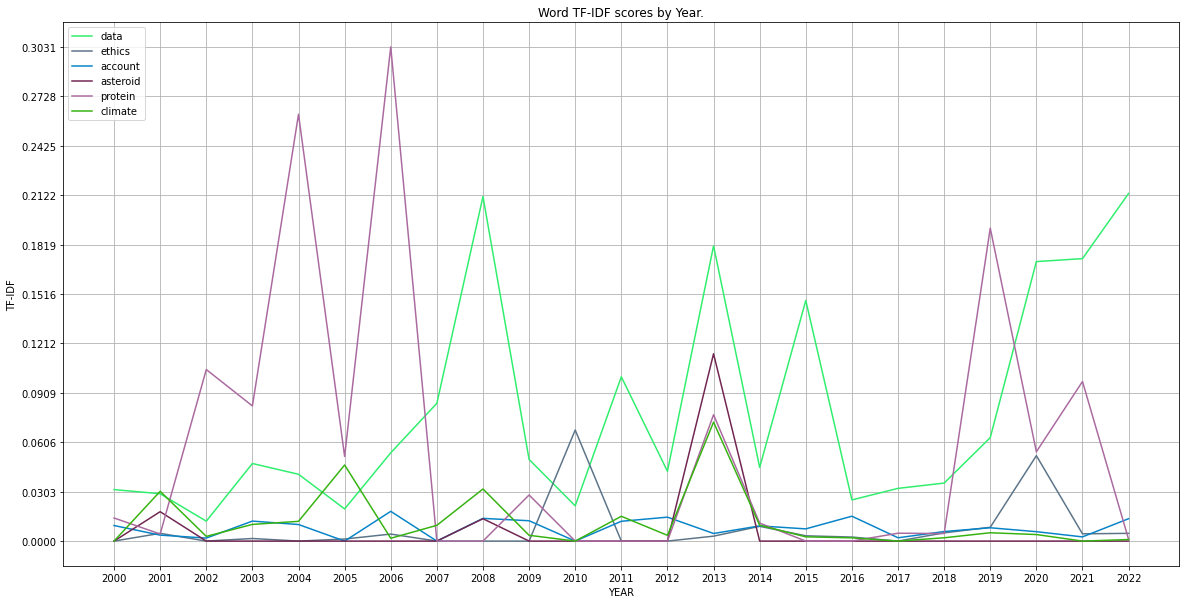

In [14]:
plot_words(cleaned_data, ["data", "ethics", "account", "asteroid", "protein", "climate"])#, "health", "data", "transport", "energy", "climate", "rights", "human", "brain", "pandemic", "asteroid"])

In [15]:
check_word(cleaned_data, "death", 20)

,year,term,tfidf
254822,2019,death,0.044502
95726,2007,death,0.024048
175274,2013,death,0.015123
215048,2016,death,0.014849
188532,2014,death,0.012078
201790,2015,death,0.009715
135500,2010,death,0.009082
241564,2018,death,0.005905
16178,2001,death,0.004746
148758,2011,death,0.003151


## Latent Dirichlet Allocation (LDA)

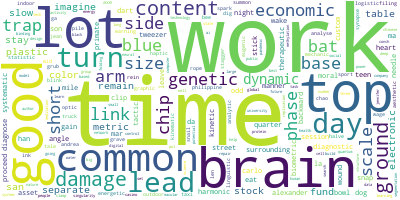

,year,term,tfidf
307825,document,data,1.834784
313442,document,people,1.602522
314175,document,protein,1.295392
305207,document,ai,1.288581
310560,document,human,1.248681
...,...,...,...
317429,document,unintentionally,0.001321
317426,document,uninoculated,0.001321
312807,document,nonoverlapping,0.001321
308483,document,doug,0.001321


In [17]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

sorted_words = cleaned_data[cleaned_data["year"] == "document"].sort_values("tfidf", ascending=False)
words = ",".join(sorted_words["term"].values)
# Generate a word cloud
wordcloud.generate(words)
# Visualize the word cloud
display(wordcloud.to_image())
sorted_words

In [18]:
import gensim.corpora as corpora

# ! re-use 'all_words' variable defined earlier.
# all_words = load_words()

id2word = corpora.Dictionary(all_words)
# print(all_words)

# Term Document Frequency
corpus = [id2word.doc2bow(year_data) for year_data in all_words]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 3), (2, 4), (3, 4), (4, 2), (5, 2), (6, 2), (7, 1), (8, 3), (9, 2), (10, 2), (11, 1), (12, 15), (13, 2), (14, 2), (15, 1), (16, 2), (17, 1), (18, 2), (19, 2), (20, 2), (21, 8), (22, 3), (23, 4), (24, 2), (25, 4), (26, 1), (27, 2), (28, 1), (29, 6)]


In [19]:
from pprint import pprint
# number of topics
print(corpus[:1][0][:30])
num_topics = 10
# Build LDA model
def build_lda():
  """Build LDA model."""
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, chunksize=100, passes=2, workers=8)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  print(f"doc_lda: {doc_lda}")
  return lda_model

[(0, 1), (1, 3), (2, 4), (3, 4), (4, 2), (5, 2), (6, 2), (7, 1), (8, 3), (9, 2), (10, 2), (11, 1), (12, 15), (13, 2), (14, 2), (15, 1), (16, 2), (17, 1), (18, 2), (19, 2), (20, 2), (21, 8), (22, 3), (23, 4), (24, 2), (25, 4), (26, 1), (27, 2), (28, 1), (29, 6)]


In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = f"ldavis_prepared_{str(num_topics)}"
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

rebuild = False  # change this to rebuild the visualization
if rebuild:
    lda_model = build_lda()
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f"{LDAvis_data_filepath}.html")
LDAvis_prepared

[(0,
  '0.010*"segmentation" + 0.009*"clinical" + 0.008*"macular" + 0.007*"data" + '
  '0.007*"learning" + 0.006*"model" + 0.006*"supplementary" + 0.006*"deep" + '
  '0.006*"retinal" + 0.006*"performance"'),
 (1,
  '0.006*"repair" + 0.005*"data" + 0.004*"human" + 0.004*"singularity" + '
  '0.004*"cell" + 0.003*"power" + 0.003*"people" + 0.003*"team" + 0.003*"time" '
  '+ 0.003*"complex"'),
 (2,
  '0.004*"conference" + 0.004*"logic" + 0.004*"artificial" + 0.004*"evidence" '
  '+ 0.003*"international" + 0.003*"meditation" + 0.003*"data" + '
  '0.003*"nuclein" + 0.003*"intelligence" + 0.003*"time"'),
 (3,
  '0.006*"task" + 0.005*"cognitive" + 0.005*"protein" + 0.004*"system" + '
  '0.004*"activity" + 0.004*"brain" + 0.004*"human" + 0.004*"time" + '
  '0.004*"replication" + 0.004*"network"'),
 (4,
  '0.005*"data" + 0.004*"ai" + 0.004*"human" + 0.003*"people" + '
  '0.003*"protein" + 0.003*"model" + 0.003*"work" + 0.003*"activity" + '
  '0.002*"control" + 0.002*"cognitive"'),
 (5,
  '0.011*

/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/CompLit/lib/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.040072 -0.016102       1        1  20.009290
0     -0.103700  0.005104       2        1  17.485231
5      0.017352  0.083790       3        1  14.939604
8      0.010534 -0.015165       4        1  11.701361
6      0.004538 -0.003871       5        1  11.104519
1      0.041037 -0.012734       6        1  10.237682
7     -0.024230 -0.015936       7        1   7.889400
2      0.002487 -0.027588       8        1   5.079168
4      0.011455  0.009255       9        1   1.042067
9      0.000456 -0.006753      10        1   0.511677, topic_info=              Term         Freq        Total Category  logprob  loglift
534           data  1972.000000  1972.000000  Default  30.0000  30.0000
6358  segmentation   724.000000   724.000000  Default  29.0000  29.0000
1663       protein   785.000000   785.000000  Default  28.0000  28.0000
1369         model  1053.000000  1053.000000  Default  27.0000  27.0000
469        control   692.000000   692.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
71              ai     3.132782   913.058283  Topic10  -6.2320  -0.3996
1528        people     3.005109   846.237650  Topic10  -6.2736  -0.3653
1015          help     2.556438   489.878724  Topic10  -6.4353   0.0197
2117    technology     2.585787   752.379982  Topic10  -6.4239  -0.3980
1919           set     2.567137   634.188898  Topic10  -6.4311  -0.2343

[844 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6545      1  0.056467  aberrant
6545      2  0.056467  aberrant
6545      3  0.056467  aberrant
6545      4  0.479973  aberrant
6545      5  0.225870  aberrant
...     ...       ...       ...
5587      4  0.072293      yang
5587      5  0.072293      yang
5587      6  0.578340      yang
5587      7  0.036146      yang
5587      8  0.036146      yang

[4133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 9, 7, 2, 8, 3, 5, 10])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9aea91d7-4b5b-4bfd-9aea-233a34d76dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

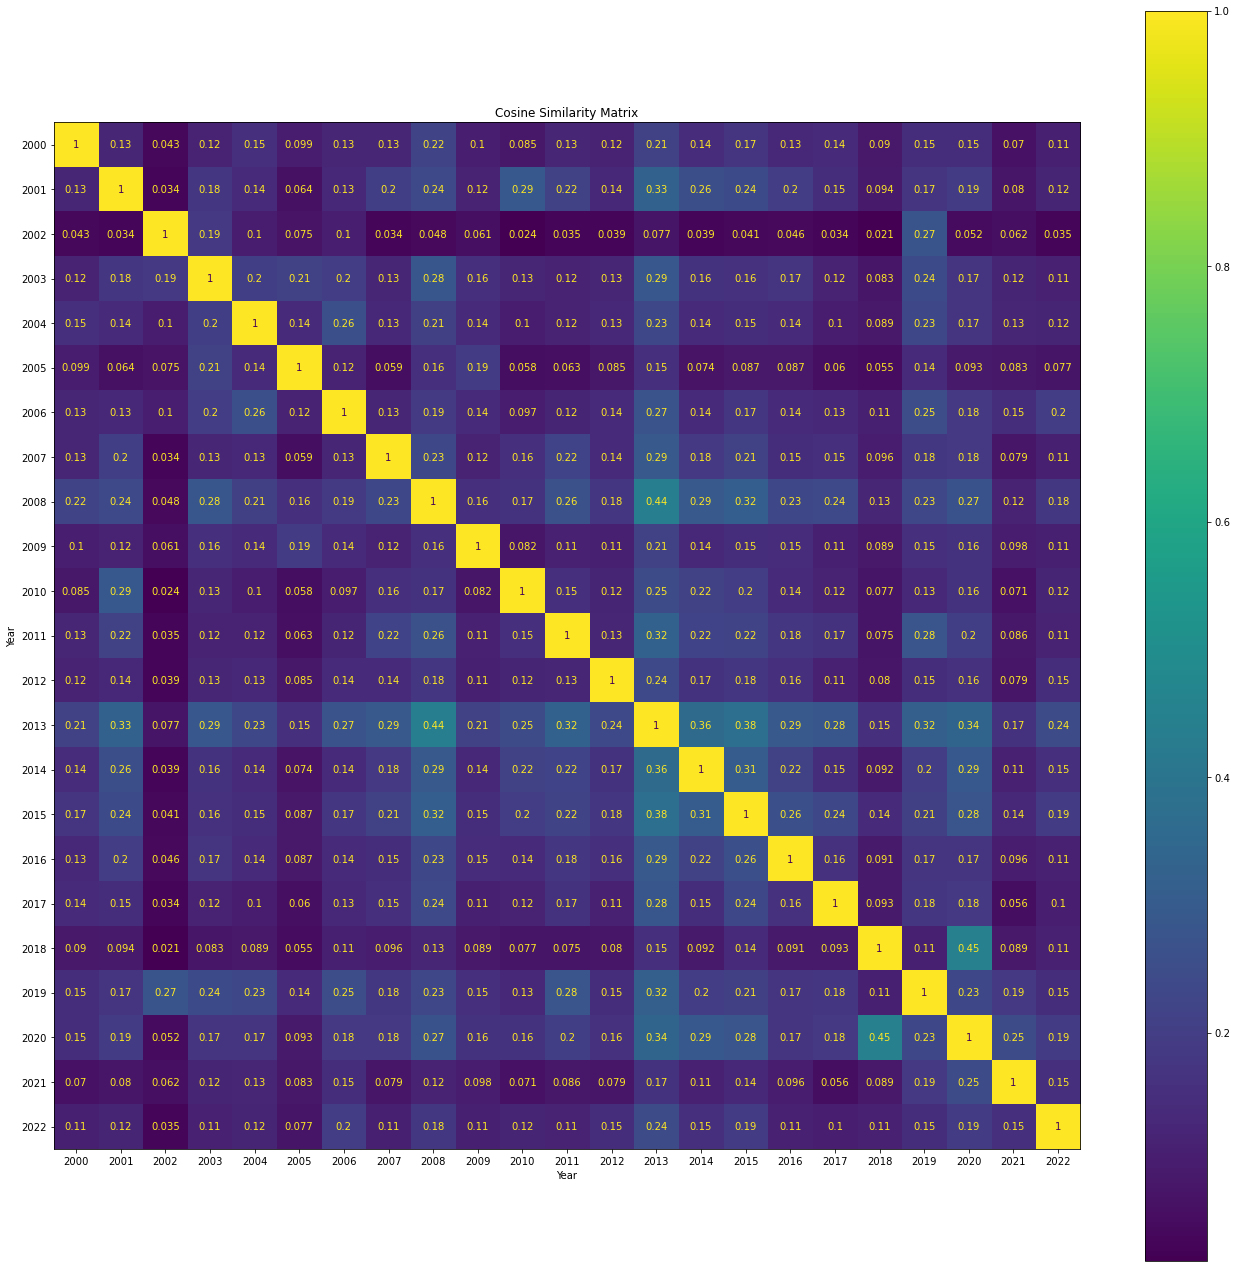

In [20]:
years_df = tfidf_df.drop(labels=["document"])
years = list(range(2000, 2023))
size=len(years)

cosine_sim = linear_kernel(years_df, years_df)
plot = ConfusionMatrixDisplay(cosine_sim, display_labels=years)
fig, ax = plt.subplots(figsize=(size, size))
ax.set (
  xticks=np.arange(size),
  yticks=np.arange(size),
  xticklabels=years,
  yticklabels=years,
  title="Cosine Similarity Matrix",
  xlabel="Year",
  ylabel="Year"
)
plot.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Year")
plt.show()

# Let's do Predictive Analysis!

In [21]:
# let's summon back our raw text!
raw_text = all_words

vocab = { word for word_list in raw_text for word in word_list }
    
vocab = sorted(vocab)
print(f"Loaded vocabulary of {len(vocab)} unique words.")

Loaded vocabulary of 13259 unique words.


In [22]:
# Utility functions to convert text to TF ids and back

class Parser():
  def __init__(self, text: List[str], batch_size=64):

    self.batch_size = batch_size
    all_text = " ".join(text)
    vocab = sorted((set(all_text)))
    self.vocab = list(vocab)
    self.char2id = tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=self.vocab, mask_token=None)
    self.id2char = tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=self.char2id.get_vocabulary(), invert=True, mask_token=None)


    self.dataset = tf.data.Dataset.from_tensor_slices(self.char2id(tf.strings.unicode_split(all_text, input_encoding="UTF-8")))
    # print(f"{len(self.dataset) = }")
    # print(self.dataset.take(1))
    
    self.sequences = self.dataset.batch(self.batch_size, drop_remainder=True)

    self.dataset = self.sequences.map(Parser.shift)

    self.dataset = (
      self.dataset
      .shuffle(1000)
      .batch(self.batch_size, drop_remainder=True)
      .prefetch(tf.data.experimental.AUTOTUNE)
    )

    print(self.dataset)
    # print(self.dataset)

    # sequences = self.dataset.batch(101, drop_remainder=True)
    # for seq in sequences.take(1):
    #   print(self.id2char(seq))
    
  def parse(self, text):
    words = text.strip().split()
    # print(words)
    chars = tf.strings.unicode_split(words, input_encoding="UTF-8")
    # print(chars)
    return self.char2id(chars)

  def build_dataset(self, text):
    """Build a dataset of TF ids."""
    self.ids_dataset = tf.data.Dataset.from_tensor_slices(self.char2id(text))
    return self.ids_dataset

  def get_words(self, ids):
    print(f"ids: {ids}")
    return tf.strings.reduce_join(self.id2char(ids), axis=-1).numpy()

  def get_string(self, ids):
    words = self.get_words(ids)
    return tf.strings.reduce_join(words, axis=-1, separator=" ").numpy()

  def vocab_size(self):
    return len(self.char2id.get_vocabulary())

  @staticmethod
  def shift(string, n=1):
    return string[:-n], string[n:]


# test
raw_text = load_words_str()
_parser = Parser(raw_text)
print(_parser.parse("amittai hello"))
# print(_parser.parse_all("abnormal"))
print(_parser.get_string(_parser.parse("amittai hello")))
print(_parser.shift("amittai"))
# print(_parser.build_dataset("hello"))

# ###

# ids_from_chars = tf.keras.layers.StringLookup(
#     vocabulary=list(vocab), mask_token=None)

# all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
# all_ids
# ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 63), dtype=tf.int64, name=None), TensorSpec(shape=(64, 63), dtype=tf.int64, name=None))>
<tf.RaggedTensor [[2, 14, 10, 21, 21, 2, 10], [9, 6, 13, 13, 16]]>
ids: <tf.RaggedTensor [[2, 14, 10, 21, 21, 2, 10], [9, 6, 13, 13, 16]]>
b'amittai hello'
('amitta', 'mittai')


In [79]:
class RNN(tf.keras.Model):
  def __init__(self, parser: Parser, embedding_dim=256, rnn_units=1024):
    super().__init__(self)
    self.parser = parser
    self.vocab_size = parser.vocab_size()
    print(self.vocab_size)
    self.batch_size = parser.batch_size
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units, return_sequences=True, return_state=True)
    self.dense = tf.keras.layers.Dense(self.vocab_size)
    self.loss_func = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = self.embedding(inputs, training=training)
    print(f"{x = }")
    if states is None:
      states = self.gru.get_initial_state(inputs=x.to_tensor())
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x)
    if return_state:
      return x, states
    return x

  def train(self, epochs=10):
    self.compile(optimizer="adam", loss=self.loss_func)

    # save checkpoints
    checkpoint_dir = "./checkpoints"

    checkpoint_prefix = os.path.join(checkpoint_dir, "checkpoint_{epoch}")

    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True)

    self.fit(self.parser.dataset, epochs=epochs, callbacks=[checkpoint_callback])
    
    

  def test(self):
    print("test")
    for input_example_batch, target_example_batch in self.parser.dataset.take(1):
      predictions = self(input_example_batch)
      print(predictions)
      print(predictions.shape)
      print(input_example_batch)
      print(target_example_batch)
      break


# test
# model = RNN(_parser)
# model.train()
# model.test()
# model.summary()
# print(model.call(tf.constant([1, 2, 3])))


In [80]:
# evaluate performance with and without learned weights.
model = RNN(_parser)
model.compile(optimizer="adam", loss=model.loss_func)
# print(f"without learned weights: {model.evaluate(_parser.dataset)}")
model.load_weights("./checkpoints/checkpoint_10")
# print(f"with learned weights: {model2.evaluate(_parser.dataset)}")
# model2.test()

28


In [94]:
class Predictor(tf.keras.Model):
  def __init__(self, model: RNN, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.parser = model.parser
    self.chars_from_ids = model.parser.char2id
    self.ids_from_chars = model.parser.id2char

    # Create a mask to prevent "[UNK]" from being generated.
    # skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    # sparse_mask = tf.SparseTensor (
    #   values=[-float('inf')]*len(skip_ids), # put -inf at bad indices
    #   indices=skip_ids,                     # Match the shape to the vocabulary
    #   dense_shape=[self.parser.vocab_size()]
    # )
    # self.prediction_mask = tf.sparse.to_dense(sparse_mask)
  
  @tf.function
  def step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    print(f"{input_chars = }")
    input_ids = self.ids_from_chars(input_chars) # .to_tensor()
    print(f"{input_ids = }")

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits # + self.prediction_mask

    # Sample the output logits to generate token IDs.
    # predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_logits, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)
    print(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

# prediction_model.step(tf.constant(["hello"]))

# start = time.time()
prediction_model = Predictor(model)
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  print(f"{next_char = }\n{states = }")
  next_char, states = prediction_model.step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
# end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
# print('\nRun time:', end - start)

next_char = <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'ROMEO:'], dtype=object)>
states = None
input_chars = tf.RaggedTensor(values=Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string), row_splits=Tensor("UnicodeSplit/UnicodeDecode:0", shape=(2,), dtype=int64))
input_ids = tf.RaggedTensor(values=Tensor("string_lookup_1/None_Lookup/LookupTableFindV2:0", shape=(None,), dtype=string), row_splits=Tensor("UnicodeSplit/UnicodeDecode:0", shape=(2,), dtype=int64))
x = tf.RaggedTensor(values=Tensor("rnn_17/embedding_17/embedding_lookup_ragged/embedding_lookup/Identity_1:0", shape=(None, 256), dtype=float32), row_splits=Tensor("UnicodeSplit/UnicodeDecode:0", shape=(2,), dtype=int64))


ValueError: in user code:

    File "/tmp/ipykernel_26816/728798616.py", line 32, in step  *
        predicted_logits = predicted_logits[:, -1, :]

    ValueError: Cannot index into an inner ragged dimension.
